In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.spatial import distance
import xml.etree.ElementTree as ET
from shapely.geometry import Polygon, LineString
import pandas as pd
#from src.generate_traffic_data import clean_carla, spawn_scene, run_scene
import carla
import os
os.getcwd()
from datetime import datetime
import time
import random
from tqdm import tqdm
import networkx as nx
import numpy as np
import pickle
from graph_creator.MapGraph import MapGraph

os.chdir('../..')
os.getcwd()

#from graph_creator.MapGraph import MapGraph
#from graph_creator.ActorGraph import ActorGraph

from graph_creator.plot_graphs import plot_lane_map_advanced, add_actors_to_map, add_actor_edges_to_map

### Start comparing graphs:

In [3]:
from glob import glob
import pickle
import networkx as nx
import random
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

graph_paths = glob("/home/tmuehlen/repos/graph_coverage/actor_graphs/carla/*.pkl")
len(graph_paths)

10882

In [4]:
random.sample(list(range(len(graph_paths))), 10)

[6605, 5183, 10025, 2971, 2239, 7323, 3618, 6451, 7876, 2147]

In [5]:
# Define a random set of coverage situations with 3 nodes each
# This still needs to be replaced by more strategically selected graphs

#idxs = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
idxs = random.sample(list(range(len(graph_paths))), 10)

coverage_graphs = {}
cov_data = {}

for idx in idxs:
    graph_path = graph_paths[idx]
    with open(graph_path, "rb") as file:
        ag_nx = pickle.load(file)
    #random.sample(ag_nx.nodes, 3)
    if ag_nx.number_of_nodes() > 2:
        coverage_graphs[idx] = ag_nx.subgraph(random.sample(list(ag_nx.nodes), 3))
        cov_data[idx] = []

cov_data["degree"] = []
cov_data["density"] = []
cov_data["diameter"] = []


In [6]:
ag_nx.nodes(data=True)

NodeDataView({'1826': {'lane_id': '0_3', 'lane_ids': ['0_3'], 's': 38.74998551607132, 'xyz': <POINT Z (136.173 -190.583 -0.017)>, 'lon_speed': 0.0, 'actor_type': <ActorType.VEHICLE: 'VEHICLE'>, 'lane_change': False}, '1845': {'lane_id': '0_2', 'lane_ids': ['0_2'], 's': 37.74999812245369, 'xyz': <POINT Z (135.316 -194.097 0.067)>, 'lon_speed': -4.525162298574e-09, 'actor_type': <ActorType.VEHICLE: 'VEHICLE'>, 'lane_change': False}})

In [7]:
for graph_path in graph_paths:
    with open(graph_path, "rb") as file:
        ag_nx = pickle.load(file)

    for key in coverage_graphs.keys():
        GM = nx.algorithms.isomorphism.DiGraphMatcher(
            ag_nx, coverage_graphs[key],
            node_match=nx.algorithms.isomorphism.categorical_node_match('actor_type', None),
            # node_match=nx.algorithms.isomorphism.categorical_node_match(['actor_type', 'lane_change'], [None, None]),
            edge_match=nx.algorithms.isomorphism.categorical_edge_match('edge_type', None)
        )
        cov_data[key].append(GM.subgraph_is_isomorphic())
    
    cov_data["degree"].append(sum(dict(ag_nx.degree()).values()) / len(ag_nx.nodes()))
    cov_data["density"].append(nx.density(ag_nx))
    cov_data["diameter"].append(nx.diameter(ag_nx))

cov_data_df = pd.DataFrame(cov_data)
cov_data_df.mean()

3994        0.309502
6109        0.551002
4972        0.358941
7028        0.358941
4480        0.309502
9650        0.358941
628         0.358941
degree      2.709352
density     0.668146
diameter    3.209337
dtype: float64

In [ ]:

list(cov_data_df.columns[:10])


In [ ]:
cov_data_df.groupby(list(cov_data_df.columns[:11]), as_index=False).size()

In [ ]:
# sns.pairplot(data=cov_data_df)
# plt.show()


### define some situations manually

In [ ]:
#graph_1 = pca_emb_df.graph_path.iloc[0].split("/")[-1].split(".pkl")[0].split("graph_")[1]
#scn_1 = graph_1[:26]

Text(0.5, 1.0, 'Scene 2025-09-14 22:08:32.660591')

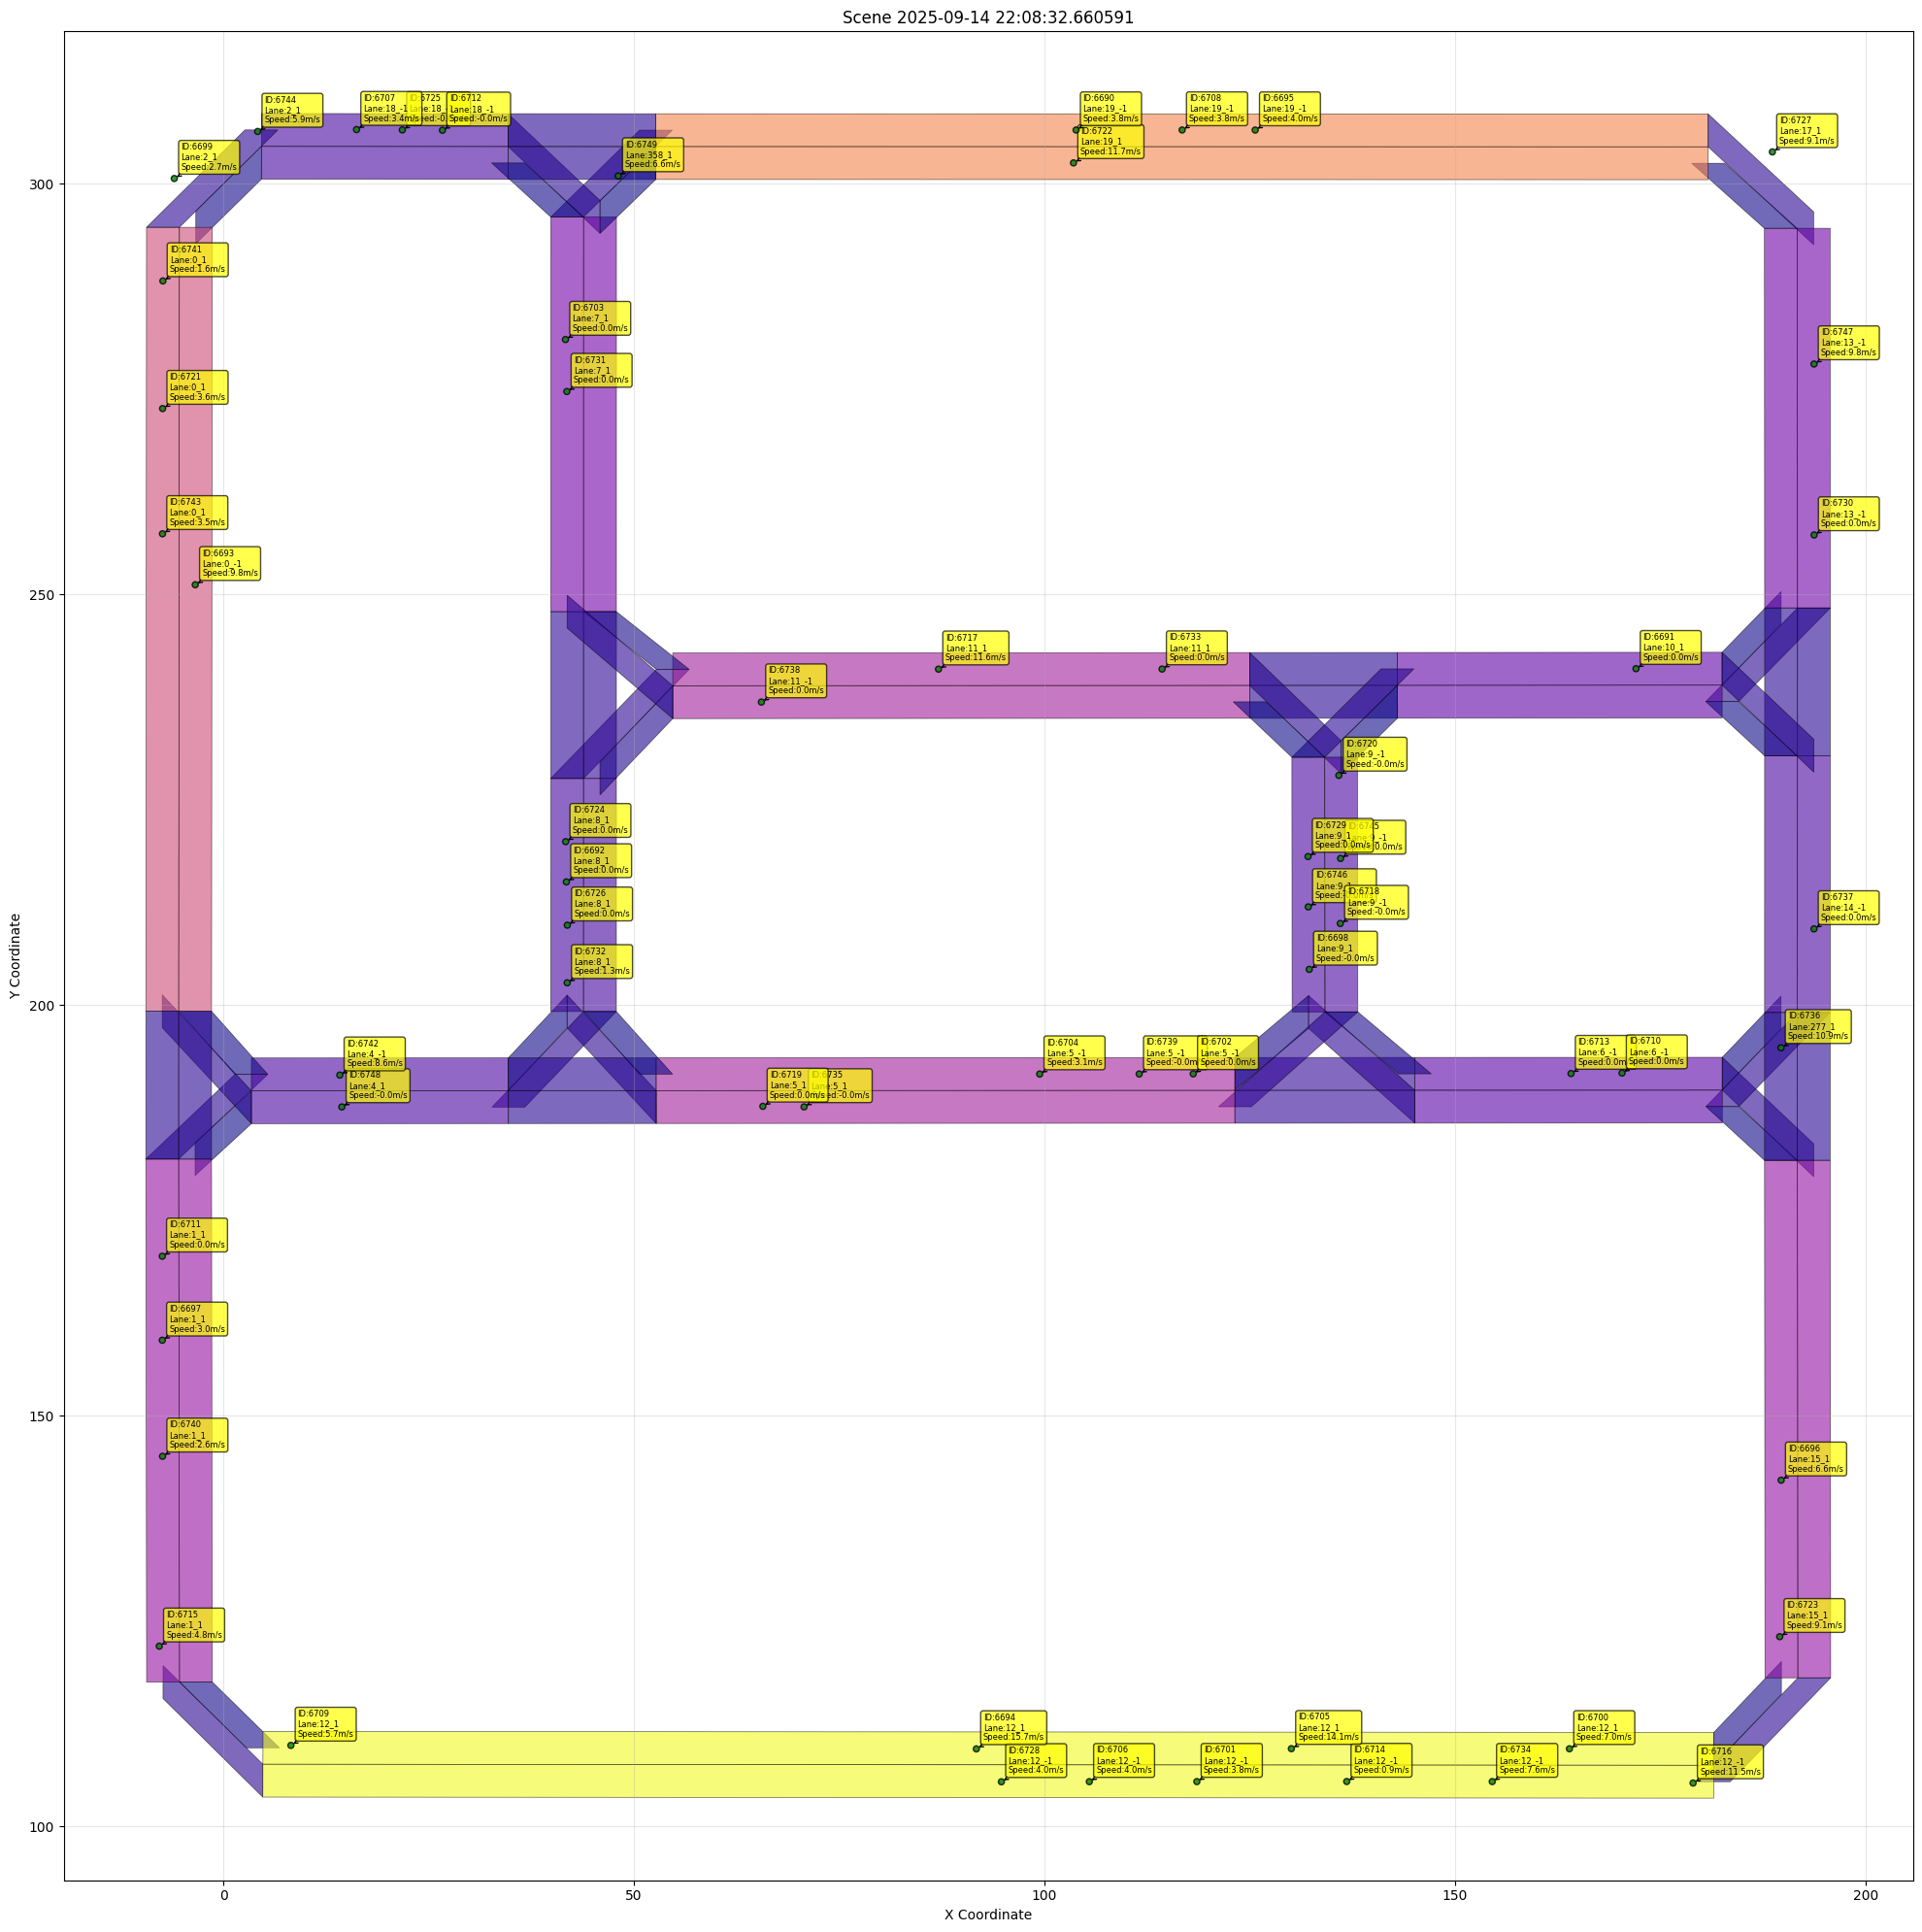

In [ ]:
idx = 10
graph_path = graph_paths[idx]
print(graph_path)
with open(graph_path, "rb") as file:
    ag_nx = pickle.load(file)


graph_1 = graph_path.split("/")[-1].split(".pkl")[0].split("graph_")[1]
scn_1 = graph_1[:26]

g_map_1 = MapGraph()
g_map_1.read_graph_from_file(f'/home/tmuehlen/repos/graph_coverage/carla/data/scene_{scn_1}_map_graph.pickle')
g_map_1 = g_map_1.graph

fig, ax1 = plt.subplots(1, 1, figsize=(20, 20))
fig, ax1 = plot_lane_map_advanced(g_map_1, figsize=None, color_by_length=True, cmap='plasma', show_labels=False, fig = fig, ax = ax1)
fig, ax1 = add_actors_to_map(fig, ax1, ag_nx, actor_size=20, show_actor_labels=True)
#fig, ax1 = add_actor_edges_to_map(fig, ax1, ag_nx)
ax1.set_title(f'Scene {scn_1}')


In [24]:
graph_path

'/home/tmuehlen/repos/graph_coverage/actor_graphs/carla/graph_2025-09-14 22:08:32.660591_11_0.pkl'

In [ ]:
# 3 vehicles in a row:
coverage_graphs = {}
cov_data = {}

#idx = 10
graph_path = graph_paths[idx]
print(graph_path)

In [36]:


graph_path = '/home/tmuehlen/repos/graph_coverage/actor_graphs/carla/graph_2025-09-14 22:08:32.660591_11_0.pkl'
with open(graph_path, "rb") as file:
    ag_nx = pickle.load(file)

graph_1 = graph_path.split("/")[-1].split(".pkl")[0].split("graph_")[1]
scn_1 = graph_1[:26]

g_map_1 = MapGraph()
g_map_1.read_graph_from_file(f'/home/tmuehlen/repos/graph_coverage/carla/data/scene_{scn_1}_map_graph.pickle')
g_map_1 = g_map_1.graph

coverage_graphs["three_vehicles_same_lane_in_a_row_no_lane_change"] = ag_nx.subgraph(["6724", "6692", "6726"])

scene_name = "three_vehicles_same_lane_in_a_row_no_lane_change"
df_nodes = pd.DataFrame.from_dict(dict(coverage_graphs[scene_name].nodes(data=True)), orient='index')
df_nodes.reset_index(inplace=True)
df_nodes.rename(columns={'index': 'node_id'}, inplace=True)
df_edges = pd.DataFrame([(u, v, d) for u, v, d in coverage_graphs[scene_name].edges(data=True)], columns=['source', 'target', 'attributes'])
df_edges = pd.concat([df_edges[['source', 'target']], pd.json_normalize(df_edges['attributes'])], axis=1)
display(df_nodes)
display(df_edges)


,node_id,lane_id,lane_ids,s,xyz,lon_speed,actor_type,lane_change
0,6726,8_1,[8_1],10.25,POINT Z (41.874229431152344 209.7234649658203 ...,1.308102e-09,ActorType.VEHICLE,False
1,6692,8_1,[8_1],15.50,POINT Z (41.759361267089844 214.9910888671875 ...,7.273472e-09,ActorType.VEHICLE,False
2,6724,8_1,[8_1],20.25,POINT Z (41.675453186035156 219.89503479003906...,3.302263e-09,ActorType.VEHICLE,False


,source,target,edge_type,path_length
0,6726,6692,following_lead,5.25
1,6692,6724,following_lead,4.75
2,6692,6726,following_lead,5.25
3,6724,6692,following_lead,4.75


In [ ]:
tmp = ag_nx.subgraph(["6724", "6692", "6726"])
tmp.nodes["6724"]["lane_change"] = True


# Notebook junkyard